In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys

In [2]:
data=pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [3]:
#Univeraiate Timeseries  
stock_data = data[['Date','Close']]

In [4]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [6]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


C:\Users\MONISH\AppData\Local\Temp\ipykernel_59408\1679346644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [ ]:
stock_data=stock_data.set_index('Date')

# why we are converting date column as a index column
# easily retrive the data
# visulization is also simple
# those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [9]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


## EDA(exploratory data analysis)
1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [10]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


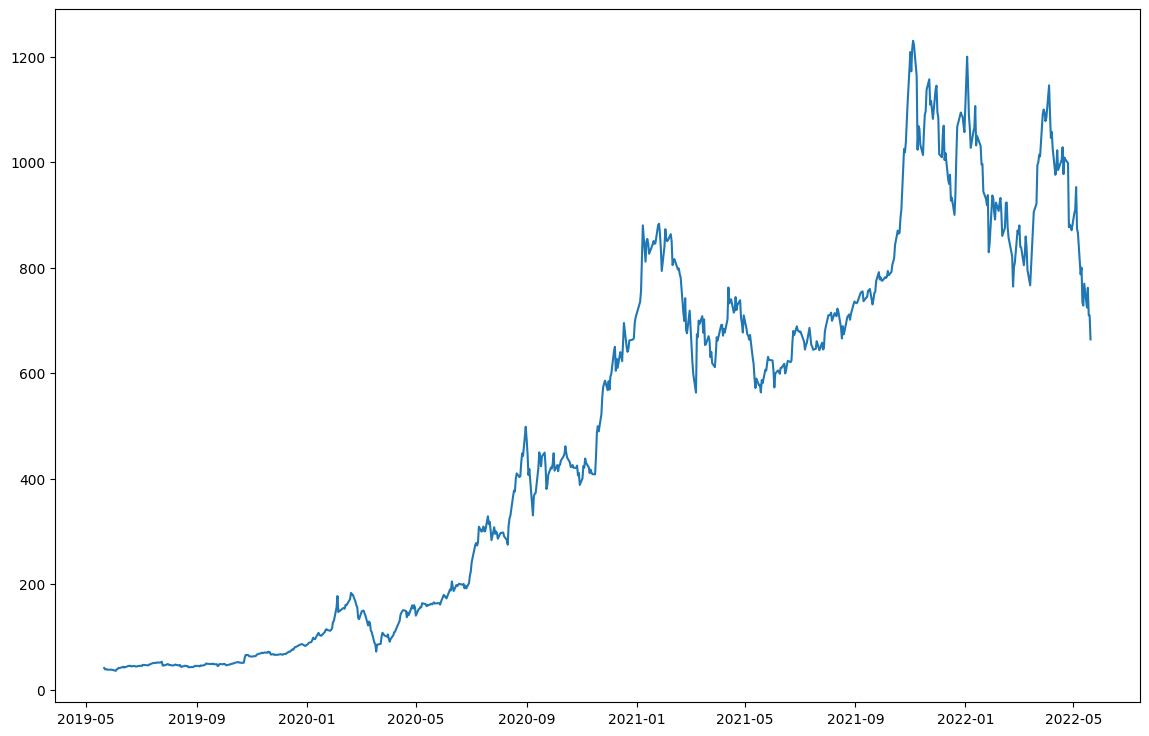

In [12]:
plt.figure(figsize=(14,9))
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

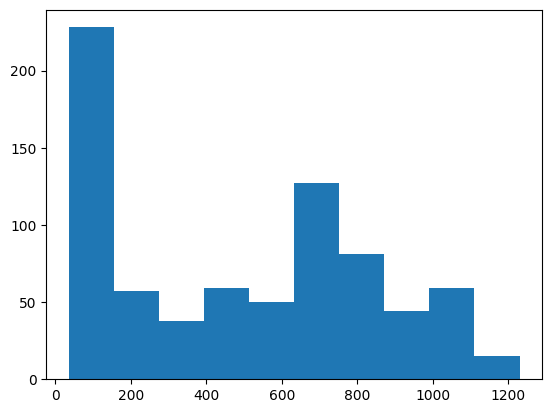

In [13]:
plt.hist(stock_data.Close)

In [ ]:
#plotting close price 
plt.style.use('ggplot')
plt.figure (figsize=(18,8))
plt.grid = True
plt.xlabel('Date',fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
